In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing dataset :

In [2]:
df_ins = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
pd.set_option('display.max_columns',99) # dispaling the all columns

In [4]:
df_ins.head() # chrcking 5 rows od the data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df_ins.shape

(1000, 40)

Data set contains 1000 rows and 40 columns.

In [6]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df_ins.isnull().sum() # checing the null values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df_ins.describe() # checking the statistcal analysis

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


#### Observations:

* As per the problem statement needs to make predictions fraud_report probem seems classification.
* There are columns like 'policy_number' and '_c39' which we can drop as no use of it.
* There are minimum values '0' which does not seems authentic hence we have to deal with it.
* There is no null values.
* But there are many columns where '?' is peresent which have to replace.
* Variance is quite high among the features.

#### Exploratry Data Analysis :

In [9]:
sns.set(style='darkgrid') # for set the baground

In [10]:
df_describe = df_ins.describe()

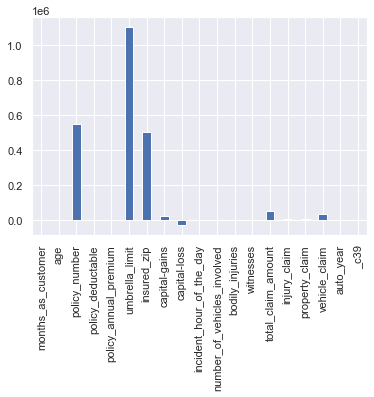

In [11]:
df_describe.loc['mean'].plot.bar()

As per above groaph we see the variance among the columns

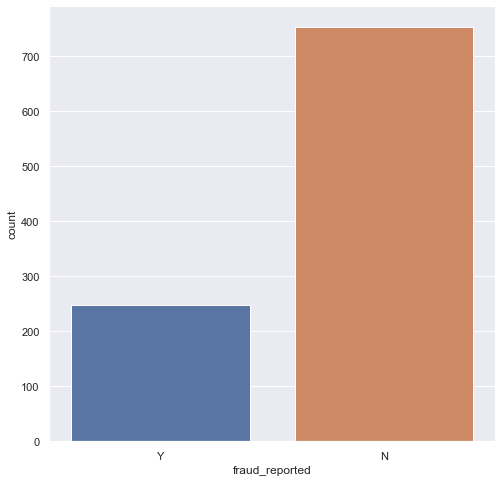

In [12]:
plt.figure(figsize=(8,8)) #checing the count of target variables
sns.countplot(x='fraud_reported',data=df_ins)

Our target variables is imbalanced.We have to deal with it.

In [13]:
#filltering the bojects type columns
df_obj_col = df_ins[['policy_state' ,'insured_sex' ,'insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','auto_make','auto_model','police_report_available']]

In [14]:
#checking the values count in different features
def value_counts(data):
    for columns in df_obj_col:
        if df_obj_col[columns].dtypes=='object':
            print(f'{columns} : {df_obj_col[columns].unique()}')    

In [15]:
value_counts(df_obj_col)

policy_state : ['OH' 'IN' 'IL']
insured_sex : ['MALE' 'FEMALE']
insured_education_level : ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation : ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies : ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship : ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type : ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type : ['Side Collision' '?' 'Rear Collision' 'Front Collision']
incident_severity : ['Major Damage' 'Minor Damage' 'Total Loss' 'Tr

Above we can see columns like 'collision_type','property_damage' and 'police_report_available' is blank value which we can consider as null.Now we are replacing the '?' into null.

In [16]:
#replacing the '?' value as nan
df_ins['collision_type'] = df_ins['collision_type'].replace('?',np.nan)
df_ins['property_damage'] = df_ins['property_damage'].replace('?',np.nan)
df_ins['police_report_available'] = df_ins['police_report_available'].replace('?',np.nan)

In [17]:
df_ins.isnull().sum()*100/df_ins.shape[0] # checking the null value which we have replaced

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                  17.8
incident_severity                0.0
authorities_contacted            0.0
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

As we can check our missing values counts is 17% ,34% annd 36% respectively.Although our data set is very small we can not loose data to deleting the null values.hence we are going to replace it using 'mode'.

In [18]:
# filling the null value with most frequest value
df_ins['collision_type'] = df_ins['collision_type'].fillna(df_ins['collision_type'].mode(1))
df_ins['property_damage'] = df_ins['property_damage'].fillna(df_ins['property_damage'].mode(1))
df_ins['police_report_available'] = df_ins['police_report_available'].fillna(df_ins['police_report_available'].mode(1))

In [19]:
from sklearn.impute import SimpleImputer # simple imputer

In [20]:
se = SimpleImputer(strategy='most_frequent') # using strategy mode

In [21]:
df_ins['collision_type'] = se.fit_transform(df_ins['collision_type'].values.reshape(-1,1))
df_ins['property_damage'] = se.fit_transform(df_ins['property_damage'].values.reshape(-1,1))
df_ins['police_report_available'] = se.fit_transform(df_ins['police_report_available'].values.reshape(-1,1))

In [22]:
df_ins = df_ins.drop(columns=['_c39'],axis=1) # _c39 col has whole null value hence removed

In [23]:
df_ins.isnull().sum().sum()

0

'0' replacing with mean.

In [24]:
df_ins['months_as_customer'] = df_ins['months_as_customer'].replace('0',df_ins['months_as_customer'].mean())
df_ins['capital-gains'] = df_ins['capital-gains'].replace('0',df_ins['capital-gains'].mean())
df_ins['capital-loss'] = df_ins['capital-loss'].replace('0',df_ins['capital-loss'].mean())
df_ins['incident_hour_of_the_day'] = df_ins['incident_hour_of_the_day'].replace('0',df_ins['incident_hour_of_the_day'].mean())
df_ins['bodily_injuries'] = df_ins['bodily_injuries'].replace('0',df_ins['bodily_injuries'].mean())
df_ins['witnesses'] = df_ins['witnesses'].replace('0',df_ins['witnesses'].mean())
df_ins['injury_claim'] = df_ins['injury_claim'].replace('0',df_ins['injury_claim'].mean())
df_ins['property_claim'] = df_ins['property_claim'].replace('0',df_ins['property_claim'].mean())
df_ins['umbrella_limit'] = df_ins['umbrella_limit'].replace('0',df_ins['umbrella_limit'].mean())

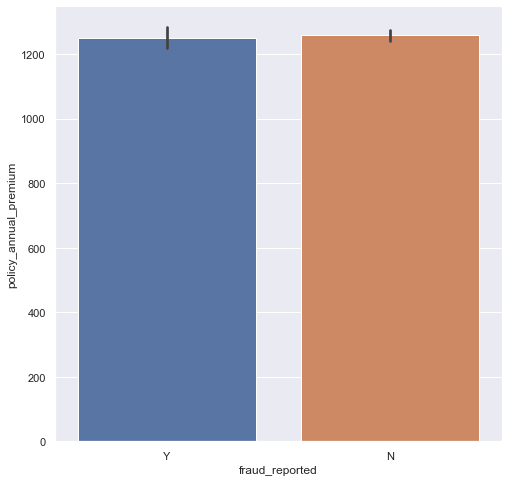

In [25]:
#checking the relation between fraud_reported and policy_annual_premium
plt.figure(figsize=(8,8))
sns.barplot(x='fraud_reported',y='policy_annual_premium',data=df_ins)

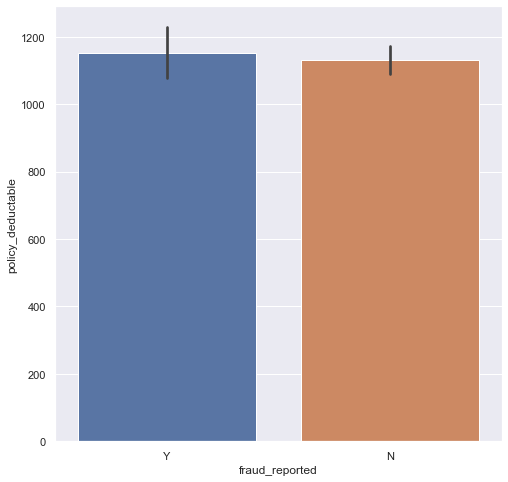

In [26]:
#checking the relation between fraud_reported and policy_deductable
plt.figure(figsize=(8,8))
sns.barplot(x='fraud_reported',y='policy_deductable',data=df_ins)

In [27]:
df_numeric = df_ins.select_dtypes(include=['int64','float64'])
df_numeric.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

### Outliars Detection and Removel :

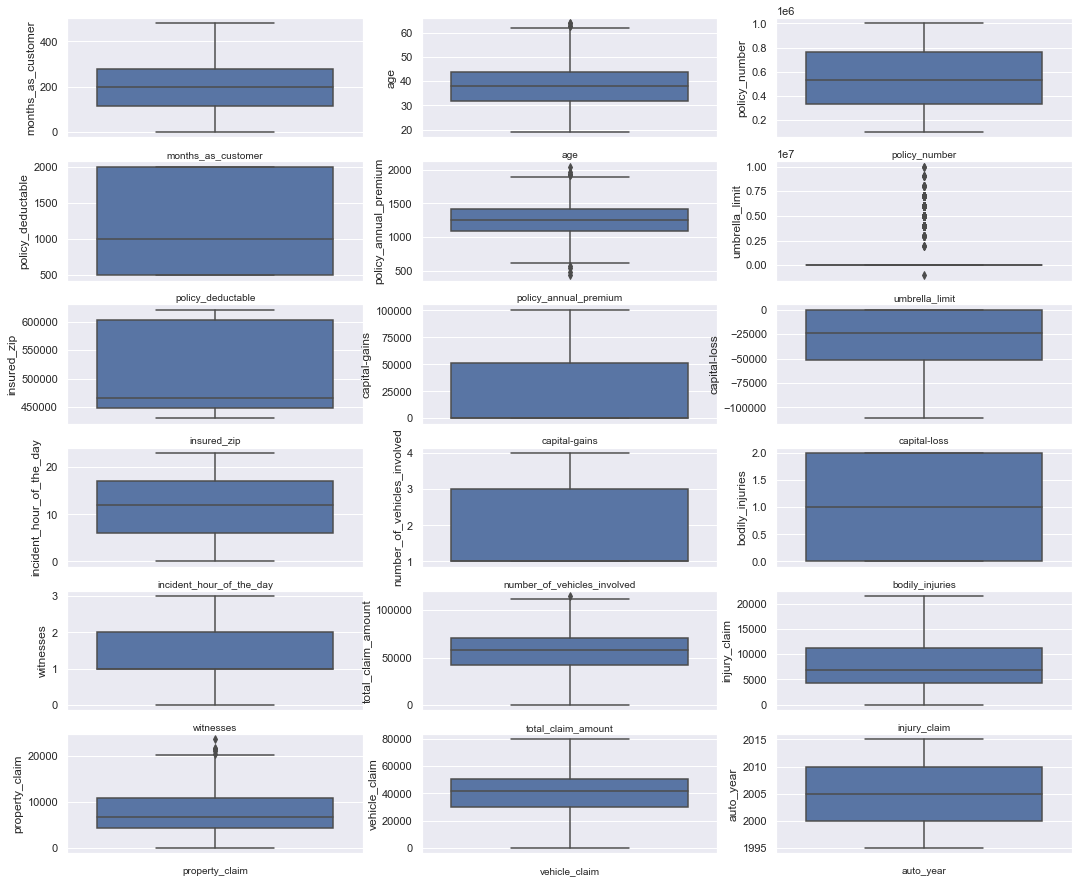

In [28]:
# Checking the distribution of data
plt.figure(figsize=(18,18))
plotnumber=1
for column in df_numeric:
    if plotnumber <=20:
        plt.subplot(7,3,plotnumber)
        sns.boxplot(df_numeric[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

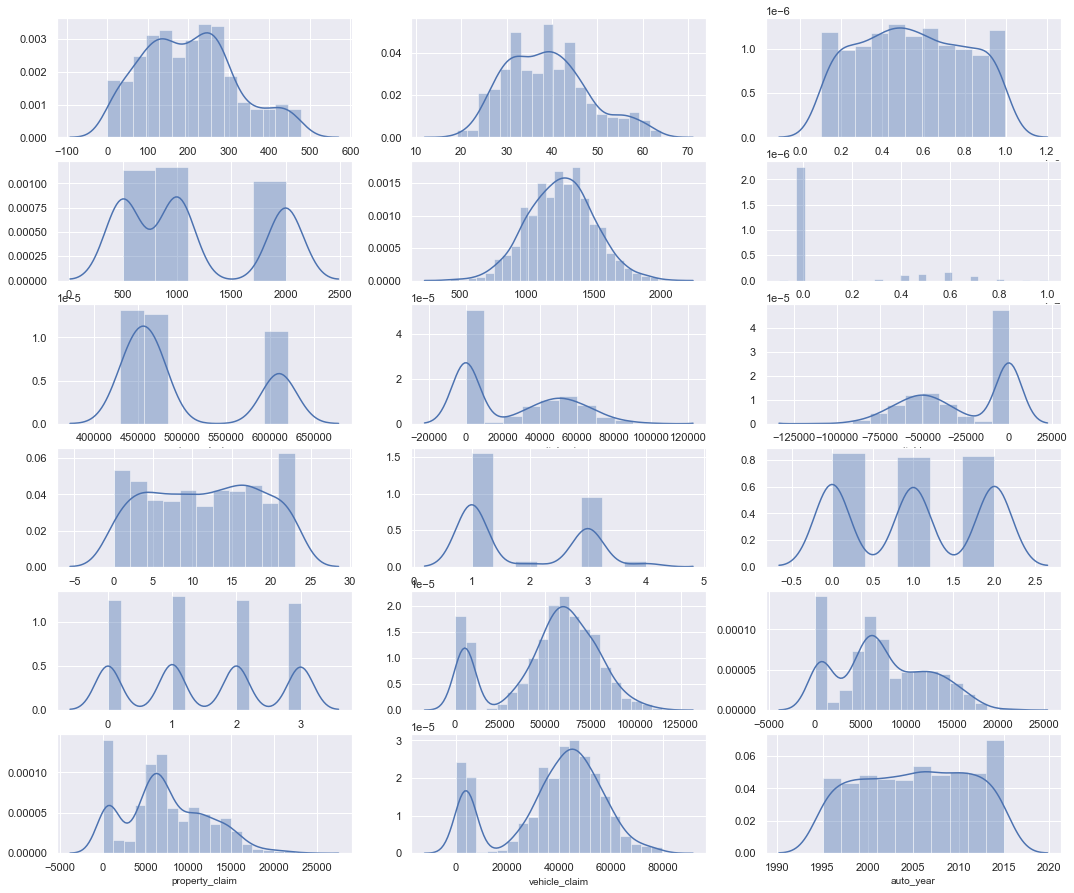

In [29]:
# Checking the distribution of data
plt.figure(figsize=(18,18))
plotnumber=1
for column in df_numeric:
    if plotnumber <=20:
        plt.subplot(7,3,plotnumber)
        sns.distplot(df_numeric[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [30]:
from sklearn.preprocessing import PowerTransformer # using fower transformation for outlair removel

In [31]:
power = PowerTransformer(method='yeo-johnson')

In [32]:
df_ins['age'] = power.fit_transform(df_ins['age'].values.reshape(-1,1))
df_ins['policy_annual_premium'] = power.fit_transform(df_ins['policy_annual_premium'].values.reshape(-1,1))
df_ins['total_claim_amount'] = power.fit_transform(df_ins['total_claim_amount'].values.reshape(-1,1))
df_ins['property_claim'] = power.fit_transform(df_ins['property_claim'].values.reshape(-1,1))

In [33]:
df_numeric1 = df_ins.select_dtypes(include=['int64','float64'])
df_numeric1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

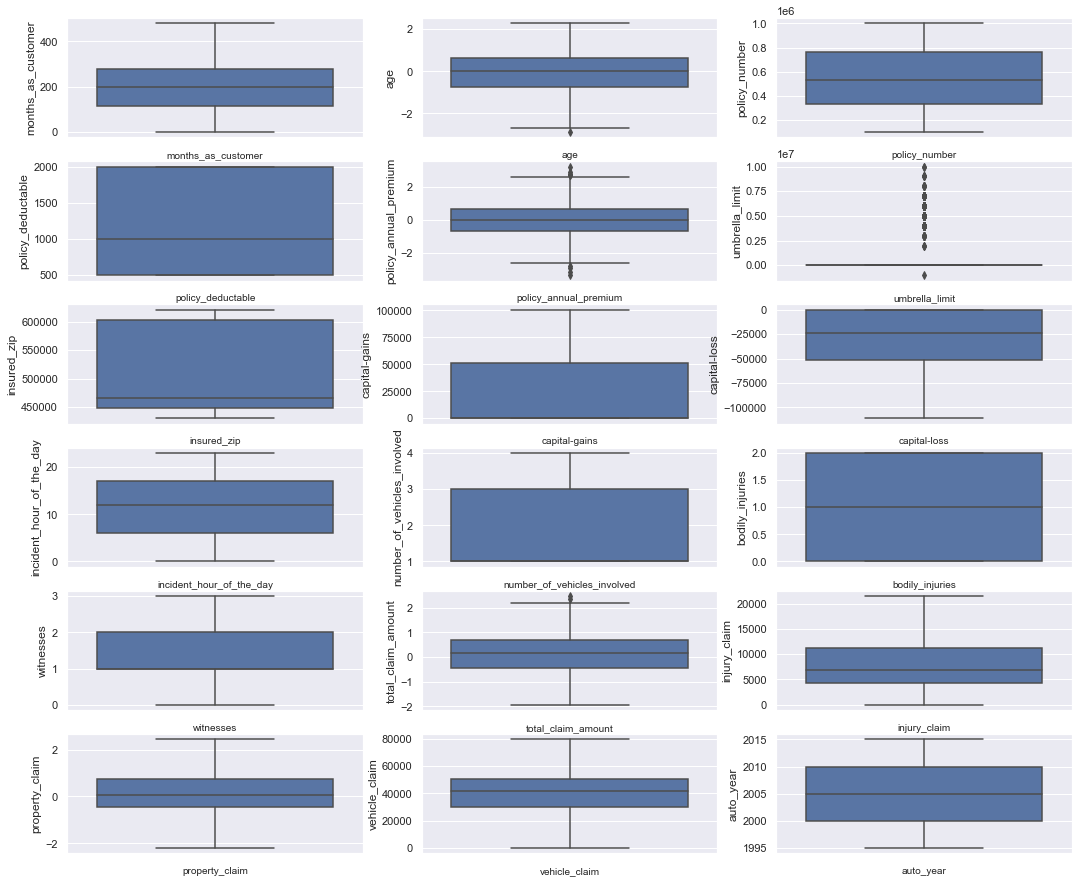

In [34]:
# Checking the distribution of data
plt.figure(figsize=(18,18))
plotnumber=1
for column in df_numeric1:
    if plotnumber <=20:
        plt.subplot(7,3,plotnumber)
        sns.boxplot(df_numeric1[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

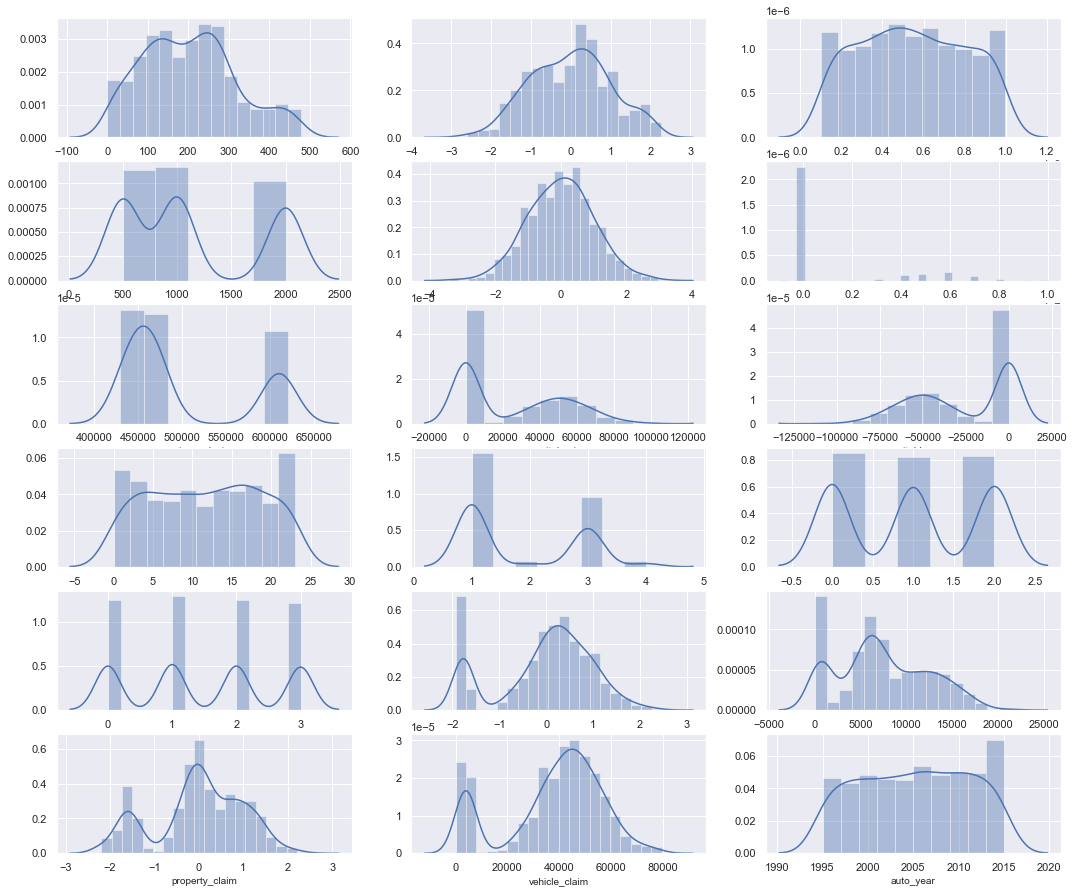

In [35]:
# Checking the distribution of data
plt.figure(figsize=(18,18))
plotnumber=1
for column in df_numeric1:
    if plotnumber <=20:
        plt.subplot(7,3,plotnumber)
        sns.distplot(df_numeric1[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

Checking correlation using heat map

In [36]:
corrrelation = df_ins.corr()

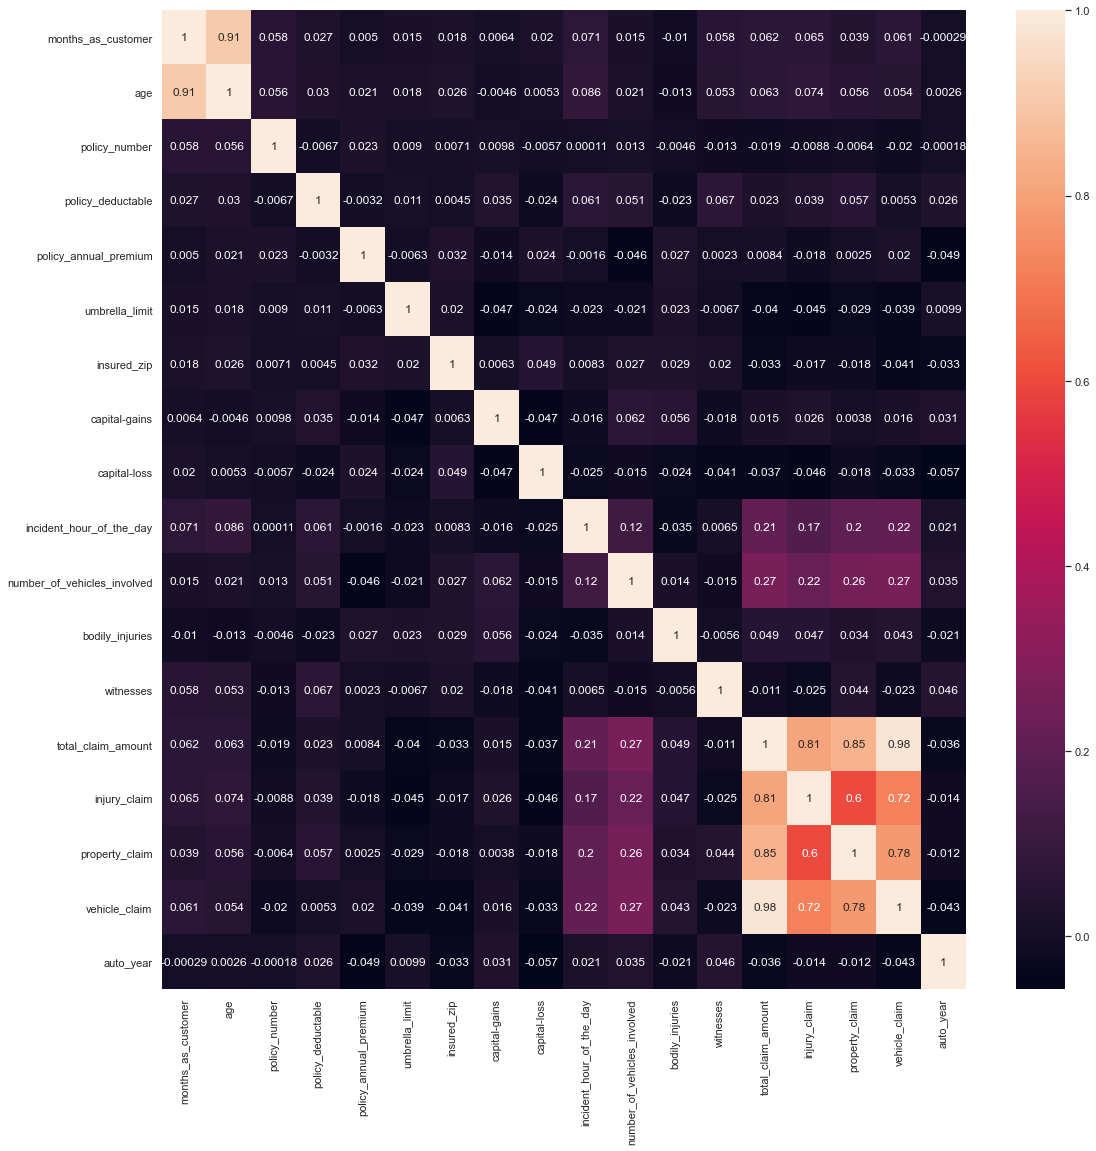

In [37]:
plt.figure(figsize=(18,18))
sns.heatmap(corrrelation,annot=True)

As per above heatmap we can cehck there are many columns like 'age' & 'months_as_customer' , 'total_claim_amount' & 'injury_claim' shows highly correlations.

#### Encoding categorical variables:

In [39]:
df_ins['fraud_reported'] = df_ins['fraud_reported'].replace({'Y':1,'N':0}) # Replacing target variables into binory

The scl(Combined single limits) columns values shows "a provision of an insurance policy that limits the coverage for all components of a claim to a single dollar amount" as per wikipidia.And this columns seems important we can not remove it.hence we convrt into numeric using get dummies function and columns like 'policy_number','policy_bind_date','incident_date','incident_state','incident_location','incident_hour_of_the_day','auto_model' we can remove it.

In [40]:
df_ins = df_ins.drop(df_ins[['policy_number','policy_bind_date','incident_date','incident_state','incident_location','incident_hour_of_the_day','auto_model']],axis=1)

In [41]:
df_ins.shape

(1000, 32)

In [43]:
new_df_ins = pd.get_dummies(df_ins,drop_first=False)

In [110]:
new_df_ins.shape

(1506, 113)

#### Dealing with Imbalanced Data :

In [57]:
from sklearn.utils import resample # using resample method

In [60]:
minority = new_df_ins[new_df_ins.fraud_reported==1]
majority = new_df_ins[new_df_ins.fraud_reported==0]

minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
new_df_ins = pd.concat([minority_upsample, majority], axis=0)

In [62]:
new_df_ins['fraud_reported'].value_counts() # imbalance '1' value has been resamples

1    753
0    753
Name: fraud_reported, dtype: int64

Spliting the data into dependent and independent variables.

In [64]:
X = new_df_ins.drop(['fraud_reported'],axis=1)
y = new_df_ins['fraud_reported']

In [65]:
print("The Shape Of X",X.shape)
print("The Shape Of Y",y.shape)

The Shape Of X (1506, 112)
The Shape Of Y (1506,)


### Model Building :

In [66]:
from sklearn.model_selection import train_test_split #for spliting into train and test 
from sklearn.preprocessing import StandardScaler  # for scaleing the data

In [67]:
scaler = StandardScaler()

In [68]:
x_scaler = scaler.fit_transform(X)

In [69]:
X_train,X_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=111)

Importing libraries for model building......!

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [73]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
svm=SVC()
gdboost=GradientBoostingClassifier()
xgboost=XGBClassifier()
print("Model is created")

Model is created


In [74]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

[14:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model is trained


In [75]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.8883968113374667
knn classification score 0.8396811337466785
dt classification score 1.0
rf classification score 1.0
adb classification score 0.895482728077945
svm classification score 0.9716563330380869
gdboost classification score 0.9477413640389726
xgboost classification score 1.0


### Model Evaluation :

Using confusion matrix in order to evaluate the models accuracy.

In [76]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [77]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[165  40]
 [ 22 150]]


In [78]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[125  80]
 [ 23 149]]


In [79]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[176  29]
 [  2 170]]


In [80]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for rf_model",'\n',rf_conf_mat)

confusion matrix for rf_model 
 [[172  33]
 [  4 168]]


In [81]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for adb_model",'\n',adb_conf_mat)

confusion matrix for adb_model 
 [[170  35]
 [ 18 154]]


In [82]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[173  32]
 [  9 163]]


In [83]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[173  32]
 [ 11 161]]


In [84]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[171  34]
 [  3 169]]


In [85]:

lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       205
           1       0.79      0.87      0.83       172

    accuracy                           0.84       377
   macro avg       0.84      0.84      0.84       377
weighted avg       0.84      0.84      0.84       377

 knn classification_report 
               precision    recall  f1-score   support

           0       0.84      0.61      0.71       205
           1       0.65      0.87      0.74       172

    accuracy                           0.73       377
   macro avg       0.75      0.74      0.73       377
weighted avg       0.76      0.73      0.72       377

 dt classification_report 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       205
           1       0.85      0.99      0.92       172

    accuracy                           0.92       377
   macro avg       0.92      0.92      0.92

### ROC AND AUC :

In [86]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [87]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.8384855360181509
0.7380175836642087
0.9234543391945548
0.9078842881452069
0.8623085649461145
0.8957884288145206
0.8899744753261485
0.9083522404991491


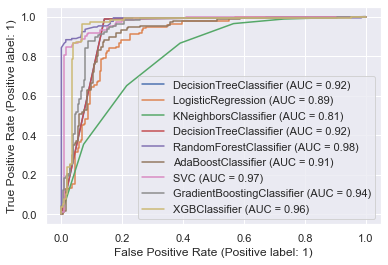

In [88]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

### CrossValidation :

In [89]:
from sklearn.model_selection import KFold,cross_val_score

In [90]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [91]:
print("Mean of Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=8).mean())
print("Mean of Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=8).mean())
print("Mean of Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=8).mean())
print("Mean of Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=8).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=8).mean())
print("Mean of Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=8).mean())
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=8).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=8).mean())

Mean of Cross validation score for lr model => 0.5729975796465159
Mean of Cross validation score for knn model => 0.6819345941686368
Mean of Cross validation score for dt model => 0.903717071935157
Mean of Cross validation score for rf model => 0.922981397050546
Mean of Cross validation score for adb model => 0.8605517561634584
Mean of Cross validation score for SVM model => 0.5291955139029607
Mean of Cross validation score for gdboost  model => 0.8950910446921084
[14:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'er

Our data was unbalanced and as f1-score and crossvalidation i found decision tree model would be a good predictorwith 92% accuracy for our problem.Now i am using the hperparameter tuning to check chances of increment in accuracy.

### HyperParameter Tuning !

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
dt.get_params().keys()  # to check the parameters

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [94]:
parm_grid  = {'criterion' : ['gini','entropy'],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3],
              'max_features':['auto', 'sqrt','log2']}


parm_grid

{'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3],
 'max_features': ['auto', 'sqrt', 'log2']}

In [96]:
gridsearch = GridSearchCV(dt, param_grid = parm_grid , cv=3,n_jobs=4)

In [97]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [98]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [99]:
dt_tune=DecisionTreeClassifier(criterion='entropy',max_features='sqrt',min_samples_leaf=1,min_samples_split=3)

In [100]:
dt_tune.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=3)

In [101]:
dt_yprad = dt_tune.predict(X_test)

In [102]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[168  37]
 [ 10 162]]


In [103]:
dt_report = classification_report(y_test,dt_yprad)
print(" svm classification_report" ,'\n',dt_report)

 svm classification_report 
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       205
           1       0.81      0.94      0.87       172

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377



In the hyper parameter tuning our model giving the less score as compare to without tuing.hence I am saving the model without tuing.

#### Model saving

In [104]:
import pickle

In [108]:
fraud_insurance_clm = 'fraud_insurance_clm.pickle'

In [109]:
pickle.dump(dt,open(fraud_insurance_clm,'wb'))

### Thank You !